# What is MDAnalysis ?


**MDAnalysis** is a Python open-source toolkit dedicated to the analysis of molecular dynamics trajectories. It is developed and maintained by a global community of scientists and it is free.  
It provides powerful and flexible framework for working with MD data, allowing to analyze trajectory files from various simulation packages.  
MDAnalysis
has been publicly available since January 2008 and was initially presented in a [paper released in 2011](https://doi.org/10.1002/jcc.21787). In 2016 a [second paper was published in 2016](https://doi.org/10.25080/majora-629e541a-00e) to describe many updates  for a better global description of the toolkit. The current version is the 2.6.1.

# Installation

## Conda

To install the lastest stable release with conda do:

`conda config --add channels conda-forge`  
`conda install mdanalysis`

## Pip

To install the lastest stable release with pip do:

`pip install --upgrade MDAnalysis`

# Storage and visualization tools

# Data storage
The starting point when working with molecular dynamics is to know the file you
are using and their extension. You can refer to this [official list](https://userguide.mdanalysis.org/stable/formats/index.html) to see the
the format supported by MDAnalysis.
Data can be stored in multiple raw forms such as a data file or transformed
forms like a plot or a movie, some of them will be presented in this section.

## Writing out data

### Frame and trajectories
MDAnalysis allows you to write frames or trajectories in any of the supported format with `.write()`:

In [1]:
import MDAnalysis as mda
import warnings


# Ignore all warnings
warnings.filterwarnings('ignore')

# Create a reference universe
reference = mda.Universe('PDB_tubuline.pdb', 
                         'trajectoire_tubuline.dcd')


ag = reference.select_atoms("name CA")

# Writing the current frame to a file
ag.write("c-alpha.pdb")

# Writing the trajectory using the 'frames' keyword
ag.write('c-alpha_all.pdb', frames='all')

# Example for slice
ag.write('c-alpha_skip2.pdb', frames=reference.trajectory[::2])

c:\Users\martb\miniconda3\envs\mdanalysis\Lib\site-packages\MDAnalysis\topology\TPRParser.py:161: DeprecationWarning: 'xdrlib' is deprecated and slated for removal in Python 3.13
  import xdrlib


# Visualisation

## Plotting trajectories
Generally, trajectories are worked on through iteration so that only the
information of the active frame are considered. A way to visualize specific
information from each frame is to extract them in a list and convert them into
other data structures such as a *Numpy* array or a *Pandas* DataFrame. This way,
plotting with *Matplotlib* can be easier to do:

### Radius of gyration using *Pandas*

In [2]:
import pandas as pd
import matplotlib.pyplot as plt


rgyr = []
time = []

protein = reference.select_atoms("protein")

for ts in reference.trajectory:
    # Extract the time from the frame
    time.append(reference.trajectory.time)
    # Extract the protein radius of gyration from the frame
    rgyr.append(protein.radius_of_gyration())

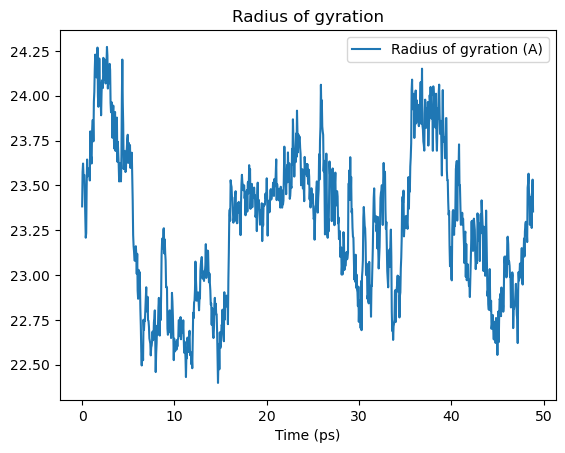

In [3]:
# Create a pandas dataframe
rgyr_df = pd.DataFrame(rgyr, columns=['Radius of gyration (A)'], index=time)
rgyr_df.index.name = 'Time (ps)'

# Create a matplotlib plot
rgyr_df.plot(title='Radius of gyration')                        
plt.show()

## NGLView


[NGL Viewer](http://nglviewer.org/) is an Interactive widget to visualize molecular structures or trajectories in Jupyter notebooks.

You can see [this tutorial](https://projects.volkamerlab.org/teachopencadd/talktorials/T017_advanced_nglview_usage.html#Custom-coloring-schemes-and-representations) from the Volkamerlab for a walkthrough of the NGLView usage.

#### Visualize a structure or a trajectory
You can perform quick visualization for different objects. Here follow a few examples:
- `.show_file()` to visualize your object by automatic recognition of the file from its extension
- `.show_pdbid()` to visualise a PDB structure from its ID
- `.show_mdanalysis` to visualize an `MDAnalysis` Universe or AtomGroup `univ`

In [4]:
import nglview as nv


view = nv.show_mdanalysis(reference)
view

NGLWidget(max_frame=999)

##### Visualizing the first and last structures of the trajectory
It can be interesting to compare frames taken from different conformations adopted during the simulation. Thus we provide an example on how to do this comparison on the first and the last frames of our simulation.  

For a better visualization of the structural differences, a simple alignement will be performed. As the most fluctuating part of the protein where found from the residues 415 to the end, this alignement will be made one the $C\alpha$ of the residues 0 to 415 of the protein.

##### Comparative visualization the most mobile part movements of the tubuline

In [5]:
from MDAnalysis.analysis import align

# Create an independent copy of the mobile Universe
mobile = reference.copy()

# Perform a backbone-wise alignment
aligner = align.AlignTraj(mobile, 
                          reference, 
                          select='backbone and resid 0-400',
                          filename='aligned_to_first_frame.dcd').run()

# Provide aligned coordinates for the trajectory
mobile = mda.Universe('PDB_tubuline.pdb', 
                      'aligned_to_first_frame.dcd')

In [6]:
# Create a view of the mobile trajectory
view = nv.show_mdanalysis(mobile)

# Add the pdb structure in the viewer
view.add_component(reference)

# Update the cartoon representation of the trajectory 
view.update_cartoon(component=0, color='red')
view.update_cartoon(component=1, color='blue')

view

NGLWidget(max_frame=999)